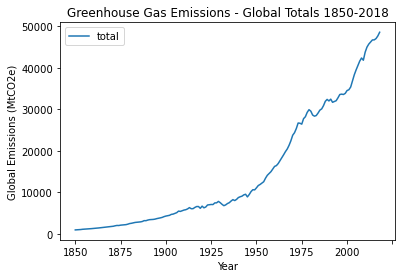

In [314]:
import csv
import re
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


"""Data Source: 
ClimateWatchData - Global Historical Emissions
Source: https://www.climatewatchdata.org/ghg-emissions?end_year=2018&start_year=1990
About ClimateWatch: https://www.climatewatchdata.org/about/description"""

#Read in file, set first column as the index
#fileIn = pd.read_csv('ghg-emissions.csv', index_col=0) #this is another data set, smaller time span, but more comprehensive
fileIn = pd.read_csv('ghg-emissions-pik.csv', index_col=0)
ems = pd.DataFrame(fileIn)

ems = ems.replace(to_replace = "FALSE", value=0)

#add column for total and mean emissions (by country) 1990 - 2018
#ems['Country_Mean'] = ems.mean(numeric_only=True, axis=1)
ems['Country_Total'] = ems.sum(numeric_only=True, axis=1)
ems = ems.sort_values('Country_Total', axis=0)

#sum of each column
yT = pd.DataFrame(ems.sum())
#took out country mean:
#yrTotals = yT.drop(labels=['Country_Mean','Country_Total'], axis=0)
yrTotals = yT.drop(labels=['Country_Total'], axis=0)

yrTotals.columns = ['total']
yrTotals.plot(title='Greenhouse Gas Emissions - Global Totals 1850-2018', xlabel='Year', ylabel='Global Emissions (MtCO2e)')
#plt.savefig('GHGEmissions-1.png')

In [304]:
#get the top 10 countries (total emissions over this time period)
emsTop10 = ems.nlargest(10,['Country_Total'])

<AxesSubplot:title={'center':'Total Emissions by Country, 1850-2018'}, xlabel='Year', ylabel='Global Emissions (MtCO2e)'>

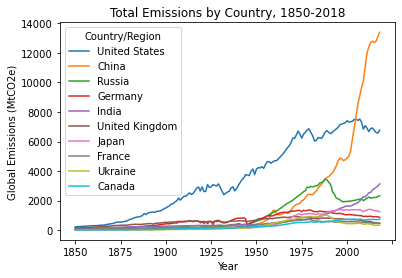

In [305]:
#plot totals over time
ems10T = emsTop10.T
ems10T.iloc[:-1].plot(title='Total Emissions by Country, 1850-2018', xlabel='Year', ylabel='Global Emissions (MtCO2e)')#top10 = list(ems10T.columns)

In [306]:
#get list of top 10
top10= list(ems10T.columns)
top10

['United States',
 'China',
 'Russia',
 'Germany',
 'India',
 'United Kingdom',
 'Japan',
 'France',
 'Ukraine',
 'Canada']

In [307]:
#drop the country totals, get percent change YoY for top 10
pct = ems10T.drop('Country_Total')
pctChg = pct.pct_change()

pctChgTop10 = pctChg[top10]
pctChgTop10.style.format("{:.2%}")

#might be interesting to see how this maps up to the YoY fluctuations of temps

Country/Region,United States,China,Russia,Germany,India,United Kingdom,Japan,France,Ukraine,Canada
1850,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
1851,5.45%,6.91%,0.75%,4.17%,11.27%,-3.80%,0.70%,1.17%,0.63%,0.81%
1852,2.59%,6.47%,0.56%,5.20%,9.84%,0.00%,0.70%,3.92%,0.63%,0.81%
1853,3.78%,5.86%,0.55%,3.61%,8.82%,0.00%,0.69%,8.87%,0.63%,0.80%
1854,3.24%,5.53%,0.73%,7.52%,7.99%,15.79%,0.69%,8.55%,0.62%,1.59%
1855,4.71%,5.24%,0.55%,8.02%,7.28%,-4.55%,0.68%,7.88%,0.62%,0.78%
1856,2.25%,4.80%,0.54%,4.42%,7.10%,5.95%,1.36%,3.13%,0.61%,1.55%
1857,1.83%,4.58%,0.54%,3.93%,5.94%,-1.12%,0.67%,1.69%,0.61%,1.53%
1858,1.08%,4.21%,0.36%,4.80%,5.61%,-1.14%,1.33%,-0.50%,0.61%,0.75%
1859,3.56%,4.04%,0.36%,-1.67%,5.31%,9.20%,1.32%,1.33%,0.60%,2.24%


In [310]:



#ems.to_csv("ems-update.csv")

def em_min_max(x):
    return pd.Series([x.min(), x.max()], index = ['min', 'max'])

mme = pd.DataFrame(ems.apply(em_min_max))
minMaxEMS = mme.drop(labels = ['Country_Total'], axis=1)
#minMaxEMS = mme.drop(labels = ['Country_Mean', 'Country_Total'], axis=1)
minMaxEMS

#ems.describe()

,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,220.0,232.0,238.0,247.0,255.0,267.0,273.0,278.0,281.0,291.0,...,10100.0,11000.0,12000.0,12400.0,12700.0,12800.0,12700.0,12800.0,13100.0,13400.0
